# Text Analytics - CFSB Complaints

In [1]:
#Load packages
import os
import sys
import swat
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
swat.options.cas.print_messages=True

# Connect to CAS

In [2]:
#User and password
user = 'yen'
import getpass
pwd = getpass.getpass()

········


In [3]:
# Set up a connection with CAS #
conn=swat.CAS('https://demo.sasdemo.ca/cas-shared-default-http/',5570,'yen',pwd,caslib="casuser")
conn.about()
conn.serverstatus()

NOTE: Grid node action status report: 1 nodes, 9 total actions executed.
NOTE: Grid node action status report: 1 nodes, 10 total actions executed.


[About]

 {'CAS': 'Cloud Analytic Services',
  'Copyright': 'Copyright Â© 2014-2018 SAS Institute Inc. All Rights Reserved.',
  'ServerTime': '2020-06-12T19:21:27Z',
  'System': {'Hostname': 'va82-12.capresales.local',
   'Linux Distribution': 'Red Hat Enterprise Linux Server release 7.8 (Maipo)',
   'Model Number': 'x86_64',
   'OS Family': 'LIN X64',
   'OS Name': 'Linux',
   'OS Release': '3.10.0-1127.8.2.el7.x86_64',
   'OS Version': '#1 SMP Thu May 7 19:30:37 EDT 2020'},
  'Version': '3.05',
  'VersionLong': 'V.03.05M0P11112019',
  'license': {'expires': '30Mar2021:00:00:00',
   'gracePeriod': 45,
   'maxCPUs': 9999,
   'site': 'iHUB 3.5 full order v2',
   'siteNum': 70180938,
   'warningPeriod': 45}}

[nodestatus]

 Node Status
 
                        name        role  uptime  running  stalled
 0  va82-12.capresales.local  controller    3.22        0        0

[server]

 Server Status
 
    nodes  actions
 0      1       10

+ Elapsed: 0.000856s, user: 0.000493s, sys: 0.000302s, mem: 0.295mb

# Text Exploration

# Load data onto the CAS Server

In [4]:
castbl=conn.read_csv("C:/Users/canyzn/Desktop/Sample Demos/Text Analytics/cfpb_complaints.csv",casout=dict(name="cfpb_complaints",replace=True))
indata="cfpb_complaints"

NOTE: Cloud Analytic Services made the uploaded file available as table CFSB_COMPLAINTS in caslib CASUSER(yen).
NOTE: The table CFSB_COMPLAINTS has been created in caslib CASUSER(yen) from binary data uploaded to Cloud Analytic Services.


In [5]:
display(castbl.shape)
pd.options.display.max_colwidth=10000
castbl.head(2)

(468827, 19)

,Date_received,Product,Sub_product,Issue,Sub_issue,Complaint,Company_public_response,Company,State,ZIP_code,Tags,Consumer_consent_provided_,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response_,Consumer_disputed_,Complaint_ID,dispute
0,7/13/2016,Debt collection,I do not know,Disclosure verification of debt,Right to dispute notice not received,"I monitor my credit report, more frequently now as we 're attempting to buy our first house. A collection notice was filed for the amount of {$3900.00}. We have received no notification of this debt, no verification of this debt, and consequently no notice of right to dispute this debt.",,Midwest Recovery Systems,VA,,Servicemember,Consent provided,Web,7/13/2016,Closed with explanation,No,Yes,2010655.0,1.0
1,5/20/2015,Debt collection,Payday loan,Communication tactics,Called after sent written cease of comm,"I had my vehicle repoed & I had to use XXXX paychecks to get it back & now I 've gotten behind on my loans. I 'm job hunting also for a second income to get caught up since my husband passed. I have references on a loan with Loan Express & a man named XXXX that works there is constantly calling all of my references & my work supervisor on a daily basis even when they 're at work or home repeatedly & also leaving messages on their phones on a daily basis. I sent them a letter stating my references names & phone numbers & asked them to please stop calling these people constantly. However my inlaw told me that yesterday he called her while she was at work repeatedly so much until she stopped answering because he started using other phone numbers to get her to answer & my other references say the same has happened to them too. Also, I do n't know why he 's calling my supervisor but it has gotten me in trouble at work & he wants him to stop leaving him messages also.",Company believes complaint represents an opportunity for improvement to better serve consumers,"Chek Cash, Inc.",TX,770XX,,Consent provided,Web,7/2/2015,Closed with explanation,Yes,No,1384427.0,0.0


# Clean up the text data

In [6]:
conn.loadActionSet('dataStep')
actions=conn.builtins.help(actionSet="dataStep")

NOTE: Added action set 'dataStep'.
NOTE: Information for action set 'dataStep':
NOTE:    dataStep
NOTE:       runCodeTable - Runs DATA step code stored in a CAS table
NOTE:       runCode - Runs DATA step code


In [7]:
conn.dataStep.runCode(code=
                     '''
                     data cfsb;
                     set cfsb_complaints;
                     complaint=lowcase(compress(complaint,'ABCDEFGHIJKLMNOPQRSTUVWXYZ.!?1234567890 ','ki'));
                     complaint=tranwrd(complaint,' xxxx','');
                     docid+1;
                     run;
                     ''')
conn.table.fetch(table='cfsb',to=5)

,Date_received,Product,Sub_product,Issue,Sub_issue,Complaint,Company_public_response,Company,State,ZIP_code,Tags,Consumer_consent_provided_,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response_,Consumer_disputed_,Complaint_ID,dispute,docid
0,8/10/2012,Bank account or service,Checking account,Problems caused by my funds being low,,,,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,326XX,Older American,N/A,Phone,8/10/2012,Closed with monetary relief,Yes,No,133403.0,0.0,14356.0
1,11/25/2014,Bank account or service,Other bank product/service,"Account opening, closing, or management",,,,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,95662,,N/A,Web,1/2/2015,Closed with explanation,Yes,No,1131364.0,0.0,14357.0
2,5/25/2016,Credit card,,Billing disputes,,,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"BANK OF AMERICA, NATIONAL ASSOCIATION",VA,23235,,N/A,Referral,5/26/2016,Closed with explanation,Yes,No,1941155.0,0.0,14358.0
3,4/3/2017,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Trouble with how payments are handled,,,"Navient Solutions, LLC.",WA,98101,,N/A,Referral,4/3/2017,Closed with explanation,Yes,No,2416537.0,0.0,14359.0
4,4/27/2015,Bank account or service,Checking account,"Account opening, closing, or management",,,Company chooses not to provide a public response,IBERIABANK,LA,70503,,N/A,Referral,4/30/2015,Closed with explanation,Yes,No,1350430.0,0.0,14360.0


# Look for Specific Terms

In [8]:
debt=conn.dataStep.runCode(code=
                          '''
                          data debt(drop=newvar);
                          set cfsb;
                          newvar=find(complaint, 'debt','i');
                          if newvar>0;
                          run;
                          ''')
display(conn.table.recordCount(table='debt'));
conn.table.fetch(table='debt',to=5)

,N
0,2053


,Date_received,Product,Sub_product,Issue,Sub_issue,Complaint,Company_public_response,Company,State,ZIP_code,Tags,Consumer_consent_provided_,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response_,Consumer_disputed_,Complaint_ID,dispute,docid
0,4/9/2017,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,this fraudulent account i have contacted soutwest credit about multiple times will not remove this collection account from my credit reports after i asked for proof this is my debt the only sent me a bill a bill is not a justification of debt. they never sent me a signed copy of my contract with them or .,,"Southwest Credit Systems, L.P.",TX,770XX,,Consent provided,Web,4/9/2017,Closed with explanation,Yes,No,2426552.0,0.0,13840.0
1,4/5/2017,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,this company portfolio recov calls me daily using a bevy of different phone numbers. i ve read that they are a collection agency. we have absolutely no past due outstanding debt. there is no reason for them to be calling me and i want it to stop! my understanding is they are scammers who try to collect fraudulent debts from unsuspecting people.,,PORTFOLIO RECOVERY ASSOCIATES INC,CT,060XX,,Consent provided,Web,4/5/2017,Closed with explanation,Yes,No,2421861.0,0.0,13868.0
2,7/8/2015,Credit card,,Other,,in i enrolled in . in chase followed their policy and charged off my account in . in i received s from chase canceling the debt owed for each card to include as income on my tax return. during i reviewed my credit reports and determined all credit bureaus were still carrying the amount owed on these accounts as balances. based upon the indentifiable event code box listed on the chase has marked a code of instructions for filling out a states the following code g decision or policy to discontinue collection. code is used to identify cancellation of debt as a result of a decision or a defined policy of the creditor to discontinue collection activity and cancel the debt. for purposes of this identifiable event a defined policy includes both a written policy and the creditor s established business practice. i have attempted to dispute these items but chase says i still owe the monies for these cards. based upon the identifiable event code chase has followed their policy and canceled the debt. a cancelation of the debt per the irs,,JPMORGAN CHASE & CO.,OH,,,Consent provided,Web,7/8/2015,Closed with non-monetary relief,Yes,No,1458651.0,0.0,13499.0
3,4/6/2017,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,this company is attempting to collect a debt for a college i have never attended. i have made several attempts to have this company provide a signed copy of an agreement with my signature on it. the only thing they have provided is a ledger that has my name on it and a balance due. i have never attended this college or done any type of business with this college. this debt company has caused me significant monetary damage as it is affecting my credit. this is bullying by a debt collector attempting to collect a debt from the wrong person.,,"Ability Recovery Services, LLC",MI,496XX,,Consent provided,Web,4/6/2017,Closed with explanation,Yes,Yes,2423700.0,1.0,13918.0
4,9/18/2015,Debt collection,Medical,Disclosure verification of debt,Right to dispute notice not received,midwest recovery systems reported a collection debt to my credit file on xxxx for 300.00 medical bill. i never received a 30 day disclosure of any collection activity. when i called them on xxxx after finding out this debt was placed on my credit file by monitoring service i was told this was a medical office debt with for xxxx and that the debt was sold from another collection agency or ? to midwest recovery systems. midwest recovery systems has violated federal law by not sending me a 30 day notice to validate the colle

In [9]:
lawyer=conn.dataStep.runCode(code=
                             '''
                          data lawyer(drop=newvar);
                          set cfsb;
                          newvar=find(complaint, 'lawyer','i');
                          if newvar>0;
                          run;
                          ''')
display(conn.table.recordCount(table='lawyer'));
conn.table.fetch(table='lawyer',to=5)

,N
0,111


,Date_received,Product,Sub_product,Issue,Sub_issue,Complaint,Company_public_response,Company,State,ZIP_code,Tags,Consumer_consent_provided_,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response_,Consumer_disputed_,Complaint_ID,dispute,docid
0,4/14/2017,Student loan,Federal student loan servicing,Can't repay my loan,Can't get flexible payment options,i am currently going through a bankruptcy and i was told by my lawyer to have any debt collectors call them. i informed navient on my federal and my private loans of this information back in 2016. they are now calling me harassing me for payment they have also sent my private loan to the collection department. when i tell them that they are to contact my lawyer they now are telling me that there is nothing on file and that they are allowed to call me. i told them to pull the phone calls and go back in there records they are refusing to do that and are still continuing to harass me. they are also contacting me by mail. i have ceased them from calling my cell phone and they are continuing to call me. when you received the default notice i called the navient phone number on the notice and again gave them my lawyers information and they are still continuing to call and harass me for payment. they have violated the fdcpa several times.,,"Navient Solutions, LLC.",AZ,853XX,,Consent provided,Web,4/14/2017,Closed with explanation,Yes,No,2435692.0,0.0,13922.0
1,5/13/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,,santander consumer usa is charging me more interest and fees than what was disclosed in the contract. this is a breach of contract and several violations under the truth lending laws under state and federal. they are also charging me add on fees and late fees that were nt disclosed. i also called the about my payment being late and i was told they would let me skip payments and just add it to the end of my contract but instead to this day xxxx2016 it s showing i am behind 1200.00. also i wanted to payoff the loan which the payoff should be around 17000.00 but santander is telling me the payoff is 20000.00 which is another violation in the truth and lending. how can santander usa get away with all the crooked business they are doing??? i have read over complaints about this business please cfpb do something. i might just find a class action lawyer to go after them.,,Santander Consumer USA Holdings Inc.,NC,280XX,,Consent provided,Web,5/13/2016,Closed with explanation,Yes,Yes,1924291.0,1.0,14397.0
2,4/5/2017,Credit card,,Sale of account,,i wanted to report that a sourh carolina magistrate judge granted portfolio recovery associates a 2000.00 judgement against me today even though the lawyer representing had no original account documentation and no chain of custody from the party they claim was the original creditor online bank. the account was opened according to their records in xxxx. their evidence was three statements. one from xxxx xxxx and xxxx. pra claims they purchased the account from and they simply provided an assignment of a portfolio number. i argued that i did nt even know the original creditor and there was no chain or custody from them to and no original paperwork showing my signature or the terms. i cited a civil suit that the consumer protection agency won against the law partners of stating that they are now required to show original account level documentation and a complete chain of customary. the judge allowed a notarized affidavit from a representative of pra to be used to establish the accuracy and authenticity of their claim although the rules i received from the court said no written witness statemen,,PORTFOLIO RECOVERY ASSOCIATES INC,SC,,,Consent provided,Web,4/6/2017,Closed with explanation,Yes,No,2420063.0,0.0,13237.0
3,4/6/2017,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,my wife and i planed to have a screened in room built in xxxx a man came out to my h

# Parse documents

In [10]:
conn.loadActionSet('textParse')
actions=conn.builtins.help(actionSet='textParse')

NOTE: Added action set 'textParse'.
NOTE: Information for action set 'textParse':
NOTE:    textParse
NOTE:       tpParse - Parses text using Natural Language Processing (NLP) techniques. This action requires a SAS Visual Text Analytics license or a SAS Visual Data Mining and Machine Learning license
NOTE:       tpAccumulate - Accumulates parsing results and generates parent and terms tables. This action requires a SAS Visual Text Analytics license or a SAS Visual Data Mining and Machine Learning license
NOTE:       tpSpell - Checks the output of the tpParse action and refines the parent spelling results for a term. This action requires a SAS Visual Text Analytics license
NOTE:       tpWordVector - Applies a word vector model to score documents. This action requires a SAS Visual Text Analytics license
NOTE:       applyWordVector - Applies a word vector model to score documents. This action requires a SAS Visual Text Analytics license


In [11]:
indata='cfsb'
conn.textParse.tpParse(
table=indata,
docid='docid',
text='complaint',
stemming=True,
nounGroups=False,
entities='none',
tagging=False,
parseConfig=dict(name='config',replace=True),
offset=dict(name='offset',replace=True))

,casLib,Name,Label,Rows,Columns,casTable
0,CASUSER(yen),offset,,1488455,9,"CASTable('offset', caslib='CASUSER(yen)')"
1,CASUSER(yen),config,,1,20,"CASTable('config', caslib='CASUSER(yen)')"


In [12]:
display(conn.table.fetch(table='config'))
conn.table.fetch(table='offset',to=5)

,_Language_,_Stemming_,_Tagging_,_NounGroup_,_Entities_,_CellWeight_,_Multiterm_,_MultitermCaslib_,_LITI_,_LITICaslib_,_DefaultEntitiesPriority_,_SelectPos_,_SelectPosList_,_SelectAttribute_,_SelectAttributeList_,_SelectEntity_,_SelectEntityList_,_PredefinedMultiterm_,_ComplexTag_,_MultitermCaseInsensitive_
0,English,Y,N,N,N,LOG,,,,,1.0,,,,,,,Y,N,N


,_Term_,_Role_,_Attribute_,_Parent_,_Start_,_End_,_Sentence_,_Paragraph_,_Document_
0,,,NaN,,NaN,NaN,NaN,0.0,1.0
1,,,NaN,,NaN,NaN,NaN,0.0,1.0
2,,,NaN,,NaN,NaN,NaN,0.0,1.0
3,,,NaN,,NaN,NaN,NaN,0.0,1.0
4,,,NaN,,NaN,NaN,NaN,0.0,1.0


# Upload a list of Stop Words

In [13]:
stoplist=conn.read_csv('C:/Users/canyzn/Desktop/Sample Demos/Text Analytics/stop_words.csv',
                      casout=dict(name='stoplist',replace=True))

NOTE: Cloud Analytic Services made the uploaded file available as table STOPLIST in caslib CASUSER(yen).
NOTE: The table STOPLIST has been created in caslib CASUSER(yen) from binary data uploaded to Cloud Analytic Services.


In [14]:
print('Upload a list of '+str(stoplist.shape[0])+' stop words.')
stoplist.head(stoplist.shape[0])

Upload a list of 571 stop words.


,Term
0,a
1,as
2,able
3,about
4,above
...,...
566,wonder
567,would
568,would
569,wouldnt


# Accumulate Terms

In [15]:
conn.textParse.tpAccumulate(
stoplist='stoplist',
stemming=True,
tagging=False,
reduce=1,
offset='offset',
showDroppedTerms=False,
parent=dict(name='parent',replace=True),
child=dict(name='child',replace=True),
terms=dict(name='terms',replace=True))

,casLib,Name,Label,Rows,Columns,casTable
0,CASUSER(yen),terms,,17421,11,"CASTable('terms', caslib='CASUSER(yen)')"
1,CASUSER(yen),parent,,280516,3,"CASTable('parent', caslib='CASUSER(yen)')"
2,CASUSER(yen),child,,300578,3,"CASTable('child', caslib='CASUSER(yen)')"


In [16]:
conn.table.fetch(table='terms',to=5)

,_Term_,_Role_,_Attribute_,_Frequency_,_NumDocs_,_Keep_,_Termnum_,_Parent_,_ParentId_,_IsPar_,_Weight_
0,felt,,Alpha,60.0,57.0,Y,11583.0,8732.0,8732.0,.,0.582925
1,mana,,Alpha,1.0,1.0,Y,1.0,NaN,1.0,,1.000000
2,labeled,,Alpha,8.0,8.0,Y,11584.0,9161.0,9161.0,.,0.784060
3,stories,,Alpha,14.0,13.0,Y,11585.0,4084.0,4084.0,.,0.736229
4,unclear,,Alpha,7.0,7.0,Y,2.0,NaN,2.0,,0.797926


# Get unique terms

In [17]:
terms_tbl=conn.CASTable(name='terms')
print('The total number of terms = '+str(terms_tbl.shape[0]))
print('The number of unique terms = ' + str(terms_tbl._term_.unique().shape[0])) 

The total number of terms = 17421
The number of unique terms = 15491


In [18]:
conn.dataStep.runCode(code=
                    '''
                    data terms_unique;
                    set terms;
                    by _Term_;
                    if last._Term_;
                    run;
                    ''')

[InputCasTables]

          casLib   Name   Rows  Columns  \
 0  CASUSER(yen)  terms  17421       11   
 
                                    casTable  
 0  CASTable('terms', caslib='CASUSER(yen)')  

[OutputCasTables]

          casLib          Name   Rows  Columns  Append Promoted  \
 0  CASUSER(yen)  terms_unique  15491       11     NaN        N   
 
                                           casTable  
 0  CASTable('terms_unique', caslib='CASUSER(yen)')  

+ Elapsed: 0.253s, user: 3.81s, sys: 0.229s, mem: 77.6mb

# Local Bar Chart

In [19]:
conn.loadActionSet('fedSql')
actions=conn.builtins.help(actionSet='fedSql')

NOTE: Added action set 'fedSql'.
NOTE: Information for action set 'fedSql':
NOTE:    fedSql
NOTE:       execDirect - Submits a SAS FedSQL language statement for immediate execution


In [20]:
#Top 25 mostly used terms
conn.fedSql.execDirect(query=
                      '''
                      CREATE TABLE top_terms AS
                      SELECT _Term_, _Frequency_
                      FROM terms_unique
                      ORDER BY _Frequency_ DESC
                      LIMIT 250;''')

NOTE: Table TOP_TERMS was created in caslib CASUSER(yen) with 250 rows returned.


+ Elapsed: 0.0242s, user: 0.0172s, sys: 0.018s, mem: 7.98mb

In [21]:
#Bring the top terms table into the local client
top_terms=conn.CASTable(name='top_terms')
top_terms=top_terms.to_frame()

top_terms.columns=['term','freq']
display(top_terms.head())
top_terms.shape

,term,freq
0,credit,8640.0
1,account,6955.0
2,call,6922.0
3,payment,6609.0
4,report,6597.0


(250, 2)

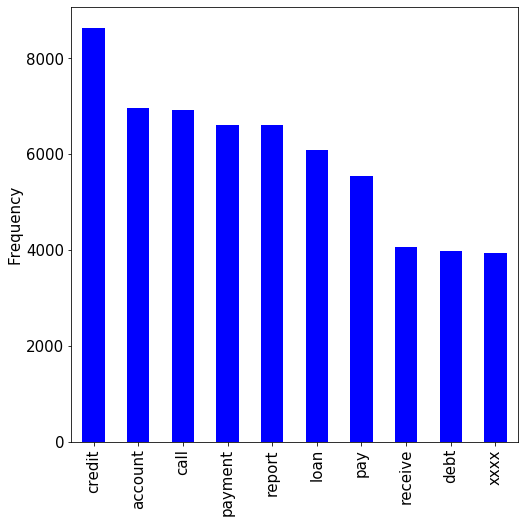

In [22]:
#Visualize at the client
termPlot=top_terms.head(10).plot(x='term',y='freq',kind='bar',figsize=(8,8),
                                fontsize=15,color='blue')
termPlot.set_xlabel('')
termPlot.set_ylabel('Frequency',fontsize=15)
termPlot.legend_.remove()
plt.show()

# Text mining and Topic discovery

In [23]:
conn.loadActionSet('textmining')
actions=conn.builtins.help(actionSet='textmining')

NOTE: Added action set 'textmining'.
NOTE: Information for action set 'textmining':
NOTE:    textMining
NOTE:       tmSvd - Computes the SVD factorization and generates topics. This action requires a SAS Visual Text Analytics license or a SAS Visual Data Mining and Machine Learning license
NOTE:       tmMine - Combines the tpParse action, the tpAccumulate action, and SVD functionality into one action. Some parameters require a SAS Visual Text Analytics license or a SAS Visual Data Mining and Machine Learning license
NOTE:       tmScore - Generates the parent table and SVD projections from new textual data based on the results from previous training data. This action requires a SAS Visual Text Analytics license or a SAS Visual Data Mining and Machine Learning license


In [24]:
conn.textMining.tmMine(
documents=indata,
docid='docid',
text='complaint',
nounGroups=False,
tagging=False,
stemming=True,
stoplist='stoplist',
reduce=1,
k=10,
numLabels=10,
topicDecision=True,

#Save same tbales from the tpParse action
parseConfig=dict(name='config',replace=True),
parent=dict(name='parent',replace=True),
child=dict(name='child',replace=True),
offset=dict(name='offset',replace=True),
terms=dict(name='terms',replace=True),

#Save tables from the tmMine action
termTopics=dict(name="term_topics",replace=True),
wordPro=dict(name='wordpro', replace=True),
docPro=dict(name='docpro',replace=True),
topics=dict(name='topics',replace=True),
u=dict(name='svdu',replace=True),
s=dict(name='singular_vals',replace=True))
    

NOTE: Topics have been requested so the document unit normalization will not occur unless requested.


,casLib,Name,Label,Rows,Columns,casTable
0,CASUSER(yen),offset,,1488455,9,"CASTable('offset', caslib='CASUSER(yen)')"
1,CASUSER(yen),terms,,17421,11,"CASTable('terms', caslib='CASUSER(yen)')"
2,CASUSER(yen),parent,,280516,3,"CASTable('parent', caslib='CASUSER(yen)')"
3,CASUSER(yen),child,,300578,3,"CASTable('child', caslib='CASUSER(yen)')"
4,CASUSER(yen),config,,1,25,"CASTable('config', caslib='CASUSER(yen)')"
5,CASUSER(yen),term_topics,,2841,3,"CASTable('term_topics', caslib='CASUSER(yen)')"
6,CASUSER(yen),svdu,,11582,11,"CASTable('svdu', caslib='CASUSER(yen)')"
7,CASUSER(yen),singular_vals,,10,2,"CASTable('singular_vals', caslib='CASUSER(yen)')"
8,CASUSER(yen),wordpro,,11582,11,"CASTable('wordpro', caslib='CASUSER(yen)')"
9,CASUSER(yen),docpro,,468827,21,"CASTable('docpro', caslib='CASUSER(yen)')"


In [25]:
conn.table.fetch(table='topics',to=5)

,_TopicId_,_Name_,_Category_,_NumTerms_,_NumDocs_,_TermCutOff_,_DocCutOff_
0,1.0,"+inquiry, equifax, +remove, xxxx, +dispute, unauthorized, +letter, +hard, +request, +authorize",Mult,223.0,0.0,0.011,0.988
1,2.0,"+loan, navient, +interest, +student, +pay, +payment, +rate, +forbearance, +month, +amount",Mult,320.0,0.0,0.011,0.998
2,3.0,"+call, +number, +phone, +work, nt, +stop, +company, +time, +leave, +message",Mult,339.0,0.0,0.011,1.039
3,4.0,"+account, +bank, +check, +open, +money, +close, +deposit, +fund, +fee, +charge",Mult,270.0,0.0,0.011,1.001
4,5.0,"+report, +credit, +account, +remove, +collection, +bureau, +pay, +bankruptcy, +agency, +show",Mult,264.0,0.0,0.010,1.716


# Find similar terms

In [26]:
conn.loadActionSet('textUtil')
actions=conn.builtins.help(actionSet='textUtil')

NOTE: Added action set 'textUtil'.
NOTE: Information for action set 'textUtil':
NOTE:    textUtil
NOTE:       tmAstore - Creates a text mining analytic store from text mining tables
NOTE:       tmFindSimilar - Computes similarity scores of terms based on singular value decomposition (SVD) projections
NOTE:       tmCooccur - Computes the term-by-term co-occurrence matrix


In [27]:
#Find the terms number for the word 'loan'
termnum=conn.fedSql.execDirect(query=
                              '''
                              SELECT _Termnum_
                              FROM terms_unique
                              WHERE _term_='loan';
                              ''')['Result Set']

termnum=termnum['_Termnum_'][0]
termnum

8569.0

In [28]:
#Find similar terms to the word 'loan'
conn.textUtil.tmFindSimilar(
table='wordpro',
termnum=termnum,
num_svd='5',
prefix='col',
casOut=dict(name='similar',replace=True))

conn.table.fetch(table='similar',to=5)

,_TermNum_,_Similar_
0,1.0,-0.126062
1,2.0,0.865115
2,3.0,0.274470
3,4.0,-0.704392
4,5.0,-0.210312


In [29]:
#Merging term numbers to terms
conn.dataStep.runCode(code=
                     '''
                     data similar_terms (keep=term _termnum simnum);
                     merge terms_unique(IN=in1 rename=(_term_=Term))
                     similar (IN=in2 rename=(_Similar_=simnum));
                     by _termnum_;
                     if (In1=1 and In2=1);
                     run;''')

NOTE: Duplicate messages output by DATA step:


[InputCasTables]

          casLib          Name   Rows  Columns  \
 0  CASUSER(yen)  terms_unique  15491       11   
 1  CASUSER(yen)       similar  11582        2   
 
                                           casTable  
 0  CASTable('terms_unique', caslib='CASUSER(yen)')  
 1       CASTable('similar', caslib='CASUSER(yen)')  

[OutputCasTables]

          casLib           Name   Rows  Columns  Append Promoted  \
 0  CASUSER(yen)  similar_terms  11582        2     NaN        N   
 
                                            casTable  
 0  CASTable('similar_terms', caslib='CASUSER(yen)')  

+ Elapsed: 0.0815s, user: 0.162s, sys: 0.123s, mem: 22.2mb

In [30]:
#Find the top 5 most similar terms
print('Most similar terms')
simTerms=conn.fedSql.execDirect(query=
                               '''
                               SELECT *
                               FROM similar_terms
                               ORDER BY simnum DESC;''')['Result Set']
simTerms.head()

Most similar terms


,Term,simnum
0,loan,1.000000
1,foreberance,0.999760
2,discern,0.999038
3,upside,0.998815
4,forbeardefer,0.998815


# Text mining

## Load Cleaned data onto the CAS Server 

In [4]:
castbl=conn.read_csv("C:/Users/canyzn/Desktop/Sample Demos/Text Analytics/cfpb_complaints_clean.csv",casout=dict(name="cfpb_clean",replace=True))
indata="cfpb_clean"

NOTE: Cloud Analytic Services made the uploaded file available as table CFPB_CLEAN in caslib CASUSER(yen).
NOTE: The table CFPB_CLEAN has been created in caslib CASUSER(yen) from binary data uploaded to Cloud Analytic Services.


In [5]:
display(castbl.shape)
castbl.head() #subset of 10K rows

(10000, 2)

,dispute,complaint
0,0.0,homeownership advisor submit sls receiv fax co...
1,0.0,file complaint foreclos wrong famili home love...
2,0.0,live mortgag holder bankrupt sold loan green t...
3,0.0,wife fha back yr servic sign file chapter bank...
4,0.0,review lender month modif request document sen...


In [6]:
#Check summary
conn.loadActionSet('simple')
actions=conn.builtins.help(actionSet="simple")

NOTE: Added action set 'simple'.
NOTE: Information for action set 'simple':
NOTE:    simple
NOTE:       mdSummary - Calculates multidimensional summaries of numeric variables
NOTE:       numRows - Shows the number of rows in a Cloud Analytic Services table
NOTE:       summary - Generates descriptive statistics of numeric variables such as the sample mean, sample variance, sample size, sum of squares, and so on
NOTE:       correlation - Computes Pearson product-moment correlations.
NOTE:       regression - Performs a linear regression up to 3rd-order polynomials
NOTE:       crossTab - Performs one-way or two-way tabulations
NOTE:       distinct - Computes the distinct number of values of the variables in the variable list
NOTE:       topK - Returns the top-K and bottom-K distinct values of each variable included in the variable list based on a user-specified ranking order
NOTE:       groupBy - Builds BY groups in terms of the variable value combinations given the variables in the variab

In [7]:
conn.simple.freq(
table=indata,
inputs='dispute') #balanced

,Column,NumVar,FmtVar,Level,Frequency
0,dispute,0.0,0,1,5018.0
1,dispute,1.0,1,2,4982.0


## Partition the dataset

In [9]:
conn.loadActionSet('sampling')
actions=conn.builtins.help(actionSet='sampling')

NOTE: Added action set 'sampling'.
NOTE: Information for action set 'sampling':
NOTE:    sampling
NOTE:       srs -  Samples a proportion of data from the input table or partitions the data into no more than three portions
NOTE:       stratified - Samples a proportion of data or partitions the data into no more than three portions within each stratum
NOTE:       oversample - Samples a user-specified proportion of data from the event level and adjusts the ratio between rare events and non-rare events to a user-specified ratio
NOTE:       kfold - K-fold partitioning.


In [12]:
help(conn.sampling.srs)

Help on sampling.Srs in module swat.cas.actions object:

class sampling.Srs(CASAction)
 |  sampling.Srs(table=None, display=None, outputtables=None, seed=None, samppct=None, samppct2=None, partind=None, attributes=None, diagnostics=None, output=None, fixedobs=None, **kwargs)
 |  
 |  Samples a proportion of data from the input table or partitions the data into no more than three portions
 |  
 |  Parameters
 |  ----------
 |  table : dict or CASTable
 |      specifies the input data table.
 |  
 |      table.name : string or CASTable
 |          specifies the name of the input table.
 |  
 |      table.caslib : string, optional
 |          specifies the caslib for the input table that you want to use
 |          with the action. By default, the active caslib is used. Specify
 |          a value only if you need to access a table from a different
 |          caslib.
 |  
 |      table.where : string, optional
 |          specifies an expression for subsetting the input data.
 |  
 |    

In [14]:
conn.sampling.srs(
table=indata,
samppct=80,
samppct2=10,
seed=802,
partind=True,
output=dict(casOut=dict(name=indata,replace=True),copyVars='ALL'))

NOTE: Simple Random Sampling is in effect.
NOTE: Using SEED=802 for sampling.


[OutputCasTables]

          casLib        Name Label   Rows  Columns  \
 0  CASUSER(yen)  cfpb_clean        10000        3   
 
                                         casTable  
 0  CASTable('cfpb_clean', caslib='CASUSER(yen)')  

[SRSFreq]

 Frequencies
 
     NObs  NSamp1  NSamp2
 0  10000    8000    1000

+ Elapsed: 0.0378s, user: 0.0387s, sys: 0.0291s, mem: 86.8mb

In [15]:
conn.simple.freq(
table=indata,
inputs='_PartInd_')

,Column,NumVar,FmtVar,Level,Frequency
0,_PartInd_,0.0,0,1,1000.0
1,_PartInd_,1.0,1,2,8000.0
2,_PartInd_,2.0,2,3,1000.0


## Shuffle the data

In [16]:
conn.table.shuffle(
table=indata,
casOut=dict(name=indata, replace=True))

[caslib]

 'CASUSER(yen)'

[tableName]

 'CFPB_CLEAN'

[casTable]

 CASTable('CFPB_CLEAN', caslib='CASUSER(yen)')

+ Elapsed: 0.026s, user: 0.0126s, sys: 0.0347s, mem: 61.8mb

## Load Embedding table

In [17]:
embed=conn.read_csv("C:/Users/canyzn/Desktop/HMEQ/Text Analytics/words_embedding.csv",
                   casout=dict(name='glove',replace=True))

NOTE: Cloud Analytic Services made the uploaded file available as table GLOVE in caslib CASUSER(yen).
NOTE: The table GLOVE has been created in caslib CASUSER(yen) from binary data uploaded to Cloud Analytic Services.


In [18]:
display(embed.shape)
embed.head() #15930 obs, 101 vars

(15930, 101)

,vocab.term,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
0,loan,0.001794,-0.263228,-1.298899,-0.058547,0.235769,-0.217129,0.105874,-0.132022,0.246100,...,-0.949172,0.555701,0.887085,0.049636,0.812035,1.138523,-1.017835,0.146789,0.254112,1.113880
1,payment,-0.522696,-0.561328,-0.935466,0.121460,0.102973,-0.030521,0.091488,-0.327767,0.099885,...,-0.677825,1.299492,0.453393,0.700672,-0.413863,1.156502,-1.321609,-0.406128,0.110485,1.070087
2,mortgag,-0.643798,-0.202020,-1.366386,0.268033,0.431708,-0.359745,-0.491062,0.037036,-0.348524,...,-0.623782,0.573284,0.530984,0.232319,0.314251,1.010555,-0.729664,-0.616139,-0.198227,0.697385
3,call,-0.684729,0.430276,-0.885503,0.304203,0.205651,0.599922,0.066877,0.445255,0.001950,...,-0.995820,0.651191,0.203672,-0.876477,0.052819,0.690422,-0.844151,0.094625,-0.026625,1.415470
4,home,0.034450,-0.007651,-0.513413,-0.034746,0.294405,0.020659,0.193399,0.387376,-0.505388,...,-0.038149,0.338387,0.618084,0.205984,-0.001304,0.374112,-0.932858,-0.130848,-0.246880,0.785526


In [19]:
#Find relevant words
conn.dataStep.runCode(code=
                     '''
                     data embed_sample;
                     set glove;
                     if vocab.term in ('credit','tax','loan','debt','default',
                     'unfair','difficult','conflict','fight','harm','upset');
                     run;
                     ''')
#Global Vector for Word Representation

[InputCasTables]

          casLib   Name   Rows  Columns  \
 0  CASUSER(yen)  glove  15930      101   
 
                                    casTable  
 0  CASTable('glove', caslib='CASUSER(yen)')  

[OutputCasTables]

          casLib          Name  Rows  Columns  Append Promoted  \
 0  CASUSER(yen)  embed_sample    11      101     NaN        N   
 
                                           casTable  
 0  CASTable('embed_sample', caslib='CASUSER(yen)')  

+ Elapsed: 0.0485s, user: 0.0856s, sys: 0.0887s, mem: 21.8mb

## View word representations

,vocab.term,X1,X2
0,loan,0.001794,-0.263228
1,credit,-0.685837,-0.175707
2,tax,-1.099641,0.423443
3,debt,0.612719,0.621408
4,default,-0.432503,0.288474
5,unfair,-0.370005,0.287504
6,difficult,-0.032552,-0.204329
7,fight,0.147895,0.273340
8,harm,-0.114465,-0.544171
9,upset,0.479912,-0.177979


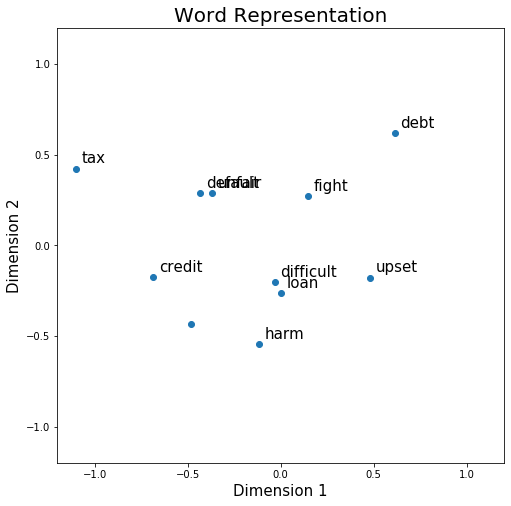

In [22]:
#Bring word embedding table locally
embed_sample=conn.CASTable(name='embed_sample')
embed10=embed_sample.to_frame()
display(embed10[['vocab.term','X1','X2']])

#Plot word representation
plt.figure(figsize=(8,8))
plt.scatter(embed10['X1'],embed10['X2'])
plt.title('Word Representation',fontsize=20)
plt.xlabel('Dimension 1',fontsize=15)
plt.ylabel('Dimension 2', fontsize=15)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
for i in range(10):
    plt.text(embed10['X1'][i]+.03,embed10['X2'][i]+.03,embed10['vocab.term'][i],fontsize=15)
plt.show()

## Build the model

In [23]:
conn.loadActionSet('deepLearn')
actions=conn.builtins.help(actionSet='deepLearn')

NOTE: Added action set 'deepLearn'.
NOTE: Information for action set 'deepLearn':
NOTE:    deepLearn
NOTE:       buildModel - Creates an empty Deep Learning model
NOTE:       addLayer - Adds a layer to a Deep Learning model
NOTE:       removeLayer - Removes a layer from a Deep Learning model
NOTE:       dlPrune - Prunes a layer in a Deep Learning model
NOTE:       modelInfo - Displays model information
NOTE:       dlTune - Tunes hyperparameters for Deep Learning model
NOTE:       dlTrain - Trains a Deep Learning model
NOTE:       dlScore - Scores a table using a Deep Learning model
NOTE:       dlExportModel - Exports a Deep Learning model
NOTE:       dlLabelTarget - Assigns the target label information
NOTE:       dlImportModelWeights - Imports model weights from an external source
NOTE:       dlJoin - Joins the data table and the annotation table


### Recurrent Neural Net - RNN

In [24]:
conn.deepLearn.buildModel(
model=dict(name='rnn',replace=True),
type='RNN')

conn.deepLearn.addLayer(
model='rnn',
layer=dict(type='input'),
replace=True,
name='data') # input layer

conn.deepLearn.addLayer(
model='rnn',
layer=dict(type='recurrent', #recurrent
          n=30, #30 nodes
          act='sigmoid', #sigmoid activation function 1/(1+e^-t)
          init='xavier', #Xavier initilization, Gaussian-distributed weights, fixed variance to avoid variance explosion or vanishing
          rnnType='rnn',
          outputType='samelength'), #meaning this layer will generate a sequence with the same length as the input
srcLayers='data', #source layer
replace=True,
name='rnn1') #recurrent layer 1

conn.deepLearn.addLayer(
model='rnn',
layer=dict(type='recurrent', #recurrent
          n=30, #30 nodes
          act='sigmoid', #sigmoid activation function 1/(1+e^-t)
          init='xavier', #Xavier initilization, Gaussian-distributed weights, fixed variance to avoid variance explosion or vanishing
          rnnType='rnn',
          outputType='encoding'), #many-to-one transformation, in that we are taking the sequence and converting it to a single value in order to predict the output
srcLayers='rnn1', #source layer
replace=True,
name='rnn2') #recurrent layer 2

conn.deepLearn.addLayer(
model='rnn',
layer=dict(type='output',act='auto',init='xavier',error='auto'),
srcLayers='rnn2',
replace=True,
name='output')

conn.deepLearn.modelInfo(
model='rnn') #calling model info table


,Descr,Value
0,Model Name,rnn
1,Model Type,Recurrent Neural Network
2,Number of Layers,4
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,0
6,Number of Pooling Layers,0
7,Number of Fully Connected Layers,0
8,Number of Recurrent Layers,2


In [27]:
#Train the model
conn.deepLearn.dlTrain(
table=dict(name=indata,where="_PartInd_=1"),
validTable=dict(name=indata, where='_PartInd_=2'),
target='dispute',
inputs='complaint',
texts='complaint',
textParms=dict(initInputEmbeddings=dict(name='glove')), #To map the embeddings to the terms in the consumer complaints
nominals='dispute',
seed='649',
modelTable='rnn',
modelWeights=dict(name='rnn_trained_weights',replace=True), #save the modelWeights as rnn_trained_weights
optimizer=dict(miniBatchSize=100,#the number of observations to use for updating the weights in the stochastic gradient descent algorithm
               maxEpochs=20, #means the total number of times the optimization passes through the entire data set
              algorithm=dict(method='adam', #The Adam method applies adjustments to the step size for each individual model parameter in an adaptive manner by approximating second-order information about the objective function based on the previous minibatch gradients
                             beta1=.9,beta2=.999, #the exponential decay rates for the first and second moment estimates of the adaptive approximation
                            learningRate=.001, clipGradmax=100, clipGradMin=-100))) #bound the gradient and prevent potentially large weight movements between epochs


,Descr,Value
0,Model Name,rnn
1,Model Type,Recurrent Neural Network
2,Number of Layers,4
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,0
6,Number of Pooling Layers,0
7,Number of Fully Connected Layers,0
8,Number of Recurrent Layers,2
9,Number of Weight Parameters,5760


In [28]:
# Scoring
conn.deepLearn.dlScore(
table=dict(name=indata,where='_PartInd_=0'),
model='rnn',
initWeights='rnn_trained_weights',
copyVars='dispute',
textParms=dict(initInputEmbeddings=dict(name='glove')),
casout=dict(name='rnn_scored',replace=True))

#Misclassification Error (%)	45.4

[OutputCasTables]

          casLib        Name  Rows  Columns  \
 0  CASUSER(yen)  rnn_scored  1000        6   
 
                                         casTable  
 0  CASTable('rnn_scored', caslib='CASUSER(yen)')  

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read          1000
 1  Number of Observations Used          1000
 2  Misclassification Error (%)          45.4
 3                   Loss Error      0.685526

+ Elapsed: 1.14s, user: 1.88s, sys: 0.434s, mem: 156mb

## Gated Recurrent Unit Neural Net - GRU

In [30]:
conn.deepLearn.buildModel(
model=dict(name='gru',replace=True),
type='RNN')

conn.deepLearn.addLayer(
model='gru',
layer=dict(type='input'),
replace=True,
name='data') #input layer

conn.deepLearn.addLayer(
model='gru',
layer=dict(type='recurrent',n=15,act='auto',init='xavier',rnnType='gru',outputType='samelength'),
srcLayers='data',
replace=True,
name='rnn1') #rnn Layer 1

conn.deepLearn.addLayer(
model='gru',
layer=dict(type='recurrent',n=15,act='auto',init='xavier',rnnType='gru',outputType='encoding'),
srcLayers='rnn1',
replace=True,
name='rnn2') #rnn Layer 2

conn.deepLearn.addLayer(
model='gru',
layer=dict(type='output',act='auto',init='xavier',error='auto'),
srcLayers='rnn2',
replace=True,
name='output') #output layer

conn.deepLearn.modelInfo(
model='gru') #calling model info table

,Descr,Value
0,Model Name,gru
1,Model Type,Recurrent Neural Network
2,Number of Layers,4
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,0
6,Number of Pooling Layers,0
7,Number of Fully Connected Layers,0
8,Number of Recurrent Layers,2


In [31]:
#Train the model
conn.deepLearn.dlTrain(
table=dict(name=indata,where="_PartInd_=1"),
validTable=dict(name=indata, where='_PartInd_=2'),
target='dispute',
inputs='complaint',
texts='complaint',
textParms=dict(initInputEmbeddings=dict(name='glove')), #To map the embeddings to the terms in the consumer complaints
nominals='dispute',
seed='649',
modelTable='gru',
modelWeights=dict(name='gru_trained_weights',replace=True), #save the modelWeights as rnn_trained_weights
optimizer=dict(miniBatchSize=100,#the number of observations to use for updating the weights in the stochastic gradient descent algorithm
               maxEpochs=20, #means the total number of times the optimization passes through the entire data set
              algorithm=dict(method='adam', #The Adam method applies adjustments to the step size for each individual model parameter in an adaptive manner by approximating second-order information about the objective function based on the previous minibatch gradients
                             beta1=.9,beta2=.999, #the exponential decay rates for the first and second moment estimates of the adaptive approximation
                            learningRate=.001, clipGradmax=100, clipGradMin=-100))) #bound the gradient and prevent potentially large weight movements between epochs


,Descr,Value
0,Model Name,gru
1,Model Type,Recurrent Neural Network
2,Number of Layers,4
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,0
6,Number of Pooling Layers,0
7,Number of Fully Connected Layers,0
8,Number of Recurrent Layers,2
9,Number of Weight Parameters,6555


In [32]:
# Scoring
conn.deepLearn.dlScore(
table=dict(name=indata,where='_PartInd_=0'),
model='gru',
initWeights='gru_trained_weights',
copyVars='dispute',
textParms=dict(initInputEmbeddings=dict(name='glove')),
casout=dict(name='gru_scored',replace=True))

#Misclassification Error (%)	42.4 >> slightly better than RNN

[OutputCasTables]

          casLib        Name  Rows  Columns  \
 0  CASUSER(yen)  gru_scored  1000        6   
 
                                         casTable  
 0  CASTable('gru_scored', caslib='CASUSER(yen)')  

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read          1000
 1  Number of Observations Used          1000
 2  Misclassification Error (%)          42.4
 3                   Loss Error      0.669068

+ Elapsed: 1.17s, user: 1.9s, sys: 0.534s, mem: 180mb

## Bring Results locally

In [36]:
gru_scored=conn.CASTable(name='gru_scored')
gru_df=gru_scored.to_frame()
gru_df.head(5)

,dispute,_DL_P0_,_DL_P1_,_DL_PredName_,_DL_PredP_,_DL_PredLevel_
0,0.0,0.332253,0.667747,0,0.667747,1.0
1,1.0,0.288731,0.711269,0,0.711269,1.0
2,1.0,0.519577,0.480423,1,0.519577,0.0
3,0.0,0.473907,0.526093,0,0.526093,1.0
4,0.0,0.773245,0.226755,1,0.773245,0.0


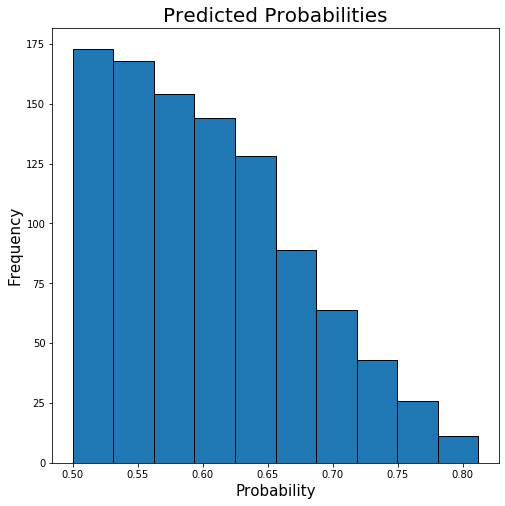

In [35]:
#Plot the prediction
plt.figure(figsize=(8,8))
plt.hist(gru_df['_DL_PredP_'],histtype='bar',ec='black')
plt.title('Predicted Probabilities',fontsize=20)
plt.xlabel('Probability',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show() #high uncertainties as most predictions are at 50%

In [38]:
#Find rate of events and non-events
events=conn.simple.freq(
table=dict(name=indata, where='_PartInd_=0'),
inputs='dispute')['Frequency']

display(events)
print('Rate of Non-Events = ' + str(round(events['Frequency'][0]/events['Frequency'].sum(),4)))

,Column,NumVar,FmtVar,Level,Frequency
0,dispute,0.0,0,1,502.0
1,dispute,1.0,1,2,498.0


Rate of Non-Events = 0.502


In [41]:
#Confusion Matrix
crosstab=conn.simple.crossTab(
table='gru_scored',
row='dispute',
col='_DL_PredName_') ['Crosstab']

display(crosstab)
crosstab=crosstab.drop('dispute',axis=1)
print('Misclassification Rate = ' + str(round(1-pd.DataFrame(np.diagonal(crosstab)).sum(axis=0)/crosstab.values.sum(),4)[0]))

print('Predicted negative | Negative = '+str(round(crosstab.divide(crosstab.sum(axis=1),axis=0)['Col1'][0],4)))
print('Predicted positive | Positive = '+str(round(crosstab.divide(crosstab.sum(axis=1),axis=0)['Col2'][1],4)))

,dispute,Col1,Col2
0,0,309.0,193.0
1,1,231.0,267.0


Misclassification Rate = 0.424
Predicted negative | Negative = 0.6155
Predicted positive | Positive = 0.5361


## Compare ROC Curves

In [42]:
conn.loadActionSet('percentile')
actions=conn.builtins.help(actionSet='percentile')

NOTE: Added action set 'percentile'.
NOTE: Information for action set 'percentile':
NOTE:    percentile
NOTE:       percentile - Calculate quantiles and percentiles
NOTE:       boxPlot - Calculate quantiles, high and low whiskers, and outliers
NOTE:       assess - Assess and compare models


In [45]:
conn.percentile.assess(
table='gru_scored',
inputs='_DL_P0_',
casout=dict(name='gru_assess',replace=True),
response='dispute',
event='1')

conn.percentile.assess(
table='rnn_scored',
inputs='_DL_P0_',
casout=dict(name='rnn_assess',replace=True),
response='dispute',
event='1')

,casLib,Name,Rows,Columns,casTable
0,CASUSER(yen),rnn_assess,20,21,"CASTable('rnn_assess', caslib='CASUSER(yen)')"
1,CASUSER(yen),rnn_assess_ROC,100,21,"CASTable('rnn_assess_ROC', caslib='CASUSER(yen)')"


In [50]:
#Bring ROC results locally
gru_assess=conn.CASTable(name='gru_assess_ROC')
gru_assess=gru_assess.to_frame()
gru_assess['Model']='GRU'

rnn_assess=conn.CASTable(name='rnn_assess_ROC')
rnn_assess=rnn_assess.to_frame()
rnn_assess['Model']='RNN'

df_assess=pd.DataFrame()
df_assess=pd.concat([gru_assess,rnn_assess])

In [51]:
#Confusion Matrix
cutoff_index=round(df_assess['_Cutoff_'],2)==0.5
compare=df_assess[cutoff_index].reset_index(drop=True)
compare[['Model','_TP_','_FP_','_FN_','_TN_']]

,Model,_TP_,_FP_,_FN_,_TN_
0,GRU,267.0,193.0,231.0,309.0
1,RNN,292.0,248.0,206.0,254.0


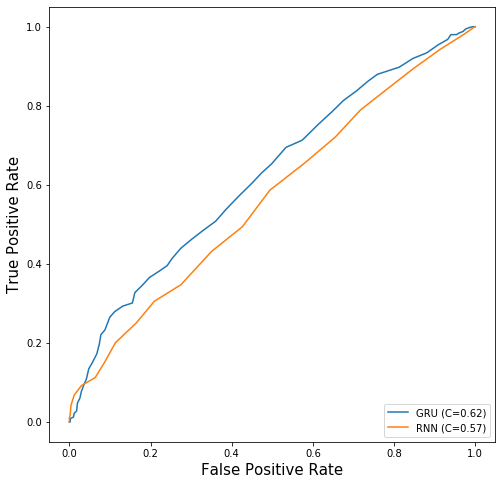

In [53]:
#ROC Curve
plt.figure(figsize=(8,8))
plt.plot()
models=list(df_assess.Model.unique())

for X in models:
    tmp=df_assess[df_assess['Model']==X]
    plt.plot(tmp['_FPR_'],tmp['_Sensitivity_'],label=X+' (C=%0.2f)'%tmp['_C_'].mean())

plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.legend(loc='lower right')
plt.show()

#GRU: C=0.62
#RNN: C=0.57

# End the Session

In [55]:
#conn.session.endSession()

SWATError: Unknown session.